## Content
1. Loading the Data
1. Data Cleaning
1. Data Exploration and Preprocessing (Encoding)
    *     Analizing Column by Column
1. Feature Engineering
    *     Descriptive Statistic
    *     New features complementation
1. Feature Selection
1. Model
1. Evaluation


## 1. Loading the Data

First we import the libraries needed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, Iterable
import ast
import os
import warnings
import ast
import json
from wordcloud import WordCloud
import seaborn as sns
from dateutil.parser import parse
from sklearn import preprocessing

In [4]:
train = pd.read_csv('../input/tmdb-box-office-prediction/train.csv')
test = pd.read_csv('../input/tmdb-box-office-prediction/test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [6]:
print("Train shape: ",train.shape, ", Test shape: " , test.shape)

Train shape:  (3000, 23) , Test shape:  (4398, 22)


We see that most of our dataset contains categorical information, and we have only three features that are numerical. Then, we may need to find some way to encode this categorical data.

The train dataset contains 3000 rows and the test dataset contains 4398. Any encoding used in the train dataset should be applied to the test data.

In [7]:
pd.set_option('display.max_columns', None)
train.sample(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
914,915,NaN,9000000,"[{'id': 36, 'name': 'History'}, {'id': 53, 'na...",http://www.bleeckerstreetmedia.com/anthropoid,tt4190530,en,Anthropoid,"In December 1941, Czech soldiers Jozef Gabƒç√≠...",8.475983,/egWtIihm9ICfPRPi3LZIjLvADMF.jpg,"[{'name': 'LD Entertainment', 'id': 10285}, {'...","[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",8/12/16,120.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,Resistance has a code name,Anthropoid,"[{'id': 74, 'name': 'germany'}, {'id': 441, 'n...","[{'cast_id': 0, 'character': 'Jan Kubi≈°', 'cr...","[{'credit_id': '580f6b79c3a3687b3e00af53', 'de...",4600000
186,187,"[{'id': 101385, 'name': 'Trailer Park Boys Col...",5000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0425601,en,Trailer Park Boys: The Movie,Set in a separate storyline not related to the...,3.172765,/qQ2wejgW472BlfSoyKgNkGjhTnm.jpg,"[{'name': 'Alliance Films', 'id': 2514}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",10/6/06,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You'll never guess who just got out of jail...,Trailer Park Boys: The Movie,"[{'id': 900, 'name': 'trailer park'}, {'id': 1...","[{'cast_id': 7, 'character': 'Julian', 'credit...","[{'credit_id': '52fe4551c3a36847f80c762f', 'de...",3833507
2419,2420,NaN,55000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",http://en.wikipedia.org/wiki/Evita_(film),tt0116250,en,Evita,The hit musical based on the life of Evita Dua...,6.709803,/7uYGJTxaeCtek6afNLPCuYCyiV4.jpg,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/14/96,134.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Most Anticipated Motion Picture Event of T...,Evita,"[{'id': 549, 'name': 'prostitute'}, {'id': 165...","[{'cast_id': 1, 'character': 'Eva Per√≥n', 'cr...","[{'credit_id': '52fe44bac3a36847f80a6c2f', 'de...",141047179
1609,1610,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0139362,en,High Art,A young female intern at a small magazine comp...,7.601439,/5ioj5ioxmtfqNKn3CUgxZMLXUCV.jpg,"[{'name': 'October Films', 'id': 236}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",6/12/98,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"a story of ambition, sacrifice, seduction and ...",High Art,"[{'id': 572, 'name': 'sex'}, {'id': 1003, 'nam...","[{'cast_id': 3, 'character': 'Syd', 'credit_id...","[{'credit_id': '561f7d8092514171d4002f14', 'de...",1929168
2057,2058,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0172627,en,Body Shots,The Los Angeles club scene is a place of booze...,4.607583,/c2o3Kai2vduoYmCcu5Yxzqc9tSr.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/7/99,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Tonight it's for sex. Tomorrow it's for real.,Body Shots,"[{'id': 567, 'name': 'alcohol'}, {'id': 570, '...","[{'cast_id': 2, 'character': 'Michael Penorisi...","[{'credit_id': '52fe45f99251416c75068c8f', 'de...",239894


In [8]:
pd.reset_option('display.max_columns')

In [9]:
#We store the original train data
train_original=train.copy()

Since there doesn't exist any document describing this dataset. Let's give an interpretation for each column:
* id: the id of the film
* belongs_to_collection: the name of film's collection/ id TMDB/ poster and background name(nan or str) json
* budget: budget of film
* genres: the type of film and the correlated id of TMDB josn
* homepage: homepage of the film
* imdb_id：id of TMDB
* orginal_language, orginal_title, overview, production_copanies,production_countries, runtime,spoken_languages,status,tagline, title, keywords,
* popularity：the popularity of film, float, Probably correlated to IMDB database
* poster_path：the link of poster path
* cast, crew, revenue

Some columns like imdb_id and poster path can be dropped, since there won't be part of this work. Popularity could also be dropped, since is a result after launching a movie but we will keep it since it also appears as a input data in the test dataset.

In [10]:
train=train.drop(['imdb_id', 'poster_path'], axis=1)

## 2. Data Cleaning

One Hot Encoding
Genre, production_companies, spoken_languages, Keywords, Cast and Crew

Binary Encoding


We begin analyzing missing data

In [11]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
original_language           0
original_title              0
overview                    8
popularity                  0
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

<BarContainer object of 21 artists>

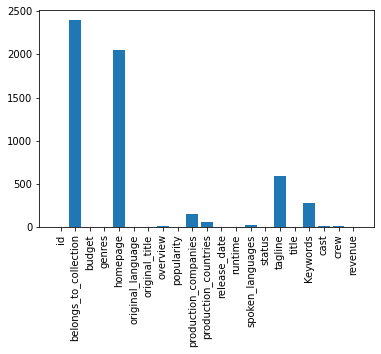

In [12]:
# to plot the null values in the different columns
null_values = train.isna().sum().reset_index()


x = null_values.iloc[:,0]
y = null_values.iloc[:,1]

x = x.tolist()
y = y.tolist()

#plt.figure(figsize=(8, 4))
plt.xticks(rotation='vertical')
plt.bar(x, y ,label='Null values count')

We observe that "belongs_to_collection" and "homepage" are the columns with more NaN values; however, this is not related to missing data but the absence of this feature. 

Then, we have "tagline" with 597 missing values, Keywords with 276 and Production_companies with 156 missing values.

Revenue, Cast, runtime, poster_path and genres present a few missing values aswell

Let's format the dictionary columns properly

In [13]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)

For homepage and tagline we can consider this data as the absence of this feature. For runtime, we just can drop those 2 rows that doesn't have information.

In [14]:
train['homepage']=train['homepage'].replace(np.NaN,'')
train['tagline']=train['tagline'].replace(np.NaN,'')
train['overview']=train['overview'].replace(np.NaN,'')

In [15]:
train=train.dropna(subset=['runtime'])

In [16]:
train.isna().sum()

id                       0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
original_language        0
original_title           0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
Keywords                 0
cast                     0
crew                     0
revenue                  0
dtype: int64

Now our data is pretty clean without NaN values

## 3. Data Exploration and Preprocessing (Encoding)

We define some functions that will be useful on this section.

In [17]:
def draw_top_graph(popularity_companies):
    popularity_companies.sort(key=lambda x: x[1], reverse=True) 

    # save the names and their respective scores separately
    # reverse the tuples to go from most frequent to least frequent 
    companies = [x[0] for x in popularity_companies]
    score = [x[1] for x in popularity_companies]
    x_pos = np.arange(len(companies)) 

    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, score, 1)
    trendline = intercept + (slope * x_pos)
    plt.figure(figsize=(16, 8))
    #plt.plot(x_pos, trendline, color='red', linestyle='--')    
    plt.bar(x_pos, score,align='center')
    plt.xticks(rotation='vertical')
    plt.xticks(x_pos, companies) 
    plt.ylabel('Popularity Score')
    plt.show()

In [18]:
def flatten(items):
    """Yield items from any nested iterable; see Reference."""
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            for sub_x in flatten(x):
                yield sub_x
        else:
            yield x

### 3.1. Analyzing Belongs_To_Collection

In [19]:
for i, e in enumerate(train.belongs_to_collection.head()):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}
4 {}


Collection data contain a lot of information. The most interesting could be ifthere exists a collection and maybe just the collection name. Let's create those columns.

We create a binary column 'has_collection' value that will be 1 if a film belong to any collection and 0 if not. We may also analyze the content of the name of a collection but we won't evaluate text for this project.

In [20]:
train['has_collection'] = train['belongs_to_collection'].map(lambda x:1 if x!={} else 0)
train=train.drop(['belongs_to_collection'],axis=1)

### 3.2. Analyzing Budget

In [21]:
train['budget'].value_counts()

0           811
15000000     72
40000000     71
25000000     71
20000000     68
           ... 
3750000       1
113           1
891000        1
5400000       1
24554         1
Name: budget, Length: 406, dtype: int64

We observe 811 zero values for budget... Being budget one of the most important features in our dataset. Shall we drop it?

(array([1.735e+03, 4.620e+02, 2.120e+02, 1.950e+02, 8.900e+01, 7.900e+01,
        5.400e+01, 4.700e+01, 2.200e+01, 2.000e+01, 1.500e+01, 2.000e+01,
        6.000e+00, 8.000e+00, 6.000e+00, 1.200e+01, 2.000e+00, 3.000e+00,
        0.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 1.26666667e+07, 2.53333333e+07, 3.80000000e+07,
        5.06666667e+07, 6.33333333e+07, 7.60000000e+07, 8.86666667e+07,
        1.01333333e+08, 1.14000000e+08, 1.26666667e+08, 1.39333333e+08,
        1.52000000e+08, 1.64666667e+08, 1.77333333e+08, 1.90000000e+08,
        2.02666667e+08, 2.15333333e+08, 2.28000000e+08, 2.40666667e+08,
        2.53333333e+08, 2.66000000e+08, 2.78666667e+08, 2.91333333e+08,
        3.04000000e+08, 3.16666667e+08, 3.29333333e+08, 3.42000000e+08,
        3.54666667e+08, 3.67333333e+08, 3.80000000e+08]),
 <a list of 30 Patch objects>)

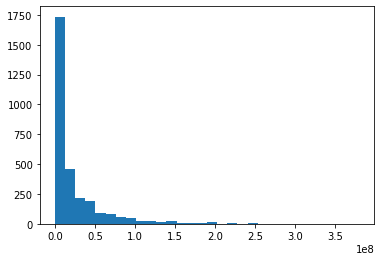

In [22]:
plt.figure()
plt.hist(train['budget'],30)

(array([9.240e+02, 1.273e+03, 2.240e+02, 1.830e+02, 8.900e+01, 7.900e+01,
        5.400e+01, 4.700e+01, 2.200e+01, 2.000e+01, 1.500e+01, 2.100e+01,
        5.000e+00, 8.000e+00, 8.000e+00, 1.000e+01, 2.000e+00, 3.000e+00,
        0.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 1.26666676e+07, 2.53333343e+07, 3.80000009e+07,
        5.06666675e+07, 6.33333342e+07, 7.60000008e+07, 8.86666674e+07,
        1.01333334e+08, 1.14000001e+08, 1.26666667e+08, 1.39333334e+08,
        1.52000001e+08, 1.64666667e+08, 1.77333334e+08, 1.90000000e+08,
        2.02666667e+08, 2.15333334e+08, 2.28000000e+08, 2.40666667e+08,
        2.53333334e+08, 2.66000000e+08, 2.78666667e+08, 2.91333334e+08,
        3.04000000e+08, 3.16666667e+08, 3.29333333e+08, 3.42000000e+08,
        3.54666667e+08, 3.67333333e+08, 3.80000000e+08]),
 <a list of 30 Patch objects>)

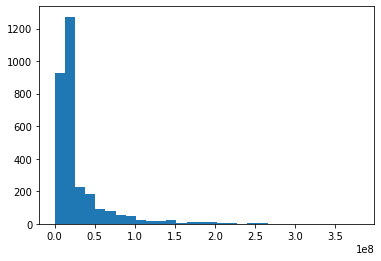

In [23]:
#Let's change the zero values by the mean value
train['budget']=train['budget'].replace(0,train['budget'].mean())
plt.hist(train['budget'],30)

### 3.3.  Analyzing the Genre columns

Let's explore what does a genre cell contain

In [24]:
for i, e in enumerate(train.genres.sample(5)):
    print(i, e)

0 [{'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 99, 'name': 'Documentary'}]
2 [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 53, 'name': 'Thriller'}]
3 [{'id': 35, 'name': 'Comedy'}]
4 [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}]


We observe that a movie can contain different genres. Then, for the case of missing genres (7 rows), we can let them as an empty value.

Let's explore all the genres.

First we see how many genders does a movie have

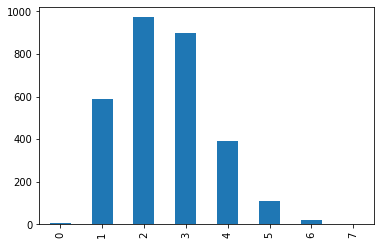

In [25]:
(train['genres'].map(lambda x:len(x) if x!=np.NaN else 0).value_counts().sort_index()).plot(kind='bar')

We see that most of the movies have two or three genres at the same time

In [26]:
train['num_genres'] = train['genres'].map(lambda x:len(x))

In [27]:
#Let's groupe just by genre name
train['all_genres'] = train['genres'].map(lambda x:[i['name'] for i in x])
train['all_genres'][:5]

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: all_genres, dtype: object

In [28]:
list_genres = list(train['all_genres'])

In [29]:
list_genres_count = []
for i in list_genres:
    for j in i:
        list_genres_count.append(j)

list_genres_count = Counter(list(list_genres_count))
genres_top = Counter(list_genres_count).most_common()

In [30]:
list_genres_count

Counter({'Comedy': 1027,
         'Drama': 1530,
         'Family': 260,
         'Romance': 571,
         'Thriller': 789,
         'Action': 741,
         'Animation': 141,
         'Adventure': 439,
         'Horror': 301,
         'Documentary': 87,
         'Music': 100,
         'Crime': 469,
         'Science Fiction': 290,
         'Mystery': 225,
         'Foreign': 31,
         'Fantasy': 232,
         'War': 100,
         'Western': 43,
         'History': 132,
         'TV Movie': 1})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

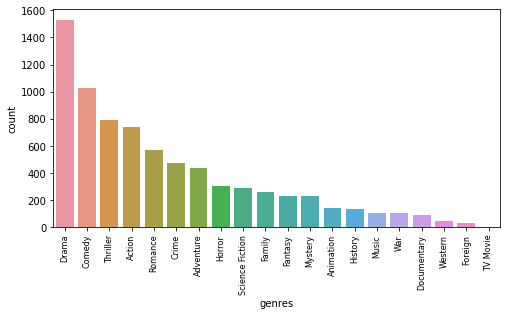

In [31]:
plt.figure(figsize=(8, 4))
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
genres_unique =Counter([i for j in list_of_genres for i in j]).most_common()
x_val = [x[0] for x in genres_unique]
y_val = [x[1] for x in genres_unique]

sns.barplot(x_val, y_val)
plt.xlabel('genres')
plt.ylabel('count')
plt.xticks(fontsize=8,rotation=90)

Most popular genre is Drama, followed by Comedy and then Thriller

In order to encode this data, let's apply one hot encoding

In [32]:
# one_hot_encoding
for i in list(list_genres_count):
    train['genres_'+i] = train['all_genres'].map(lambda x:1 if i in x else 0)

### 3.4. Analyzing the homepage column

Official homepage is related to the publicity. The more attractive it is, the better the box office, so a new column is added to determine whether the movie has a homepage.

In [33]:
train['has_homepage'] = train['homepage'].map(lambda x:0 if x=='' else 1)

In [34]:
train['has_homepage'].value_counts()

0    2052
1     946
Name: has_homepage, dtype: int64

In [35]:
train=train.drop(['homepage'],axis=1)

### 3.5. Analyzing original language

We see that there exist also a column named spoken languages, which contains more details. Let's drop this column.

In [36]:
train=train.drop(['original_language'],axis=1)

### 3.6. Analyzing original title

Maybe some text analysis can be done, but for this project we won't use any text analysis. We will analyze just the lenght of the title as a feature.



In [37]:
train['title_lenght']=train['original_title'].apply(lambda x: len(x) )

In [38]:
train=train.drop(['original_title'],axis=1)

### 3.7. Analyzing Overview

This feature would be useful if we would do some text analysis. For now, we will just drop it.


In [39]:
train=train.drop(['overview'],axis=1)

### 3.8. Analyzing Popularity

This is an numerical feature so let's see the distribution of it.


(array([2.064e+03, 8.440e+02, 5.500e+01, 1.400e+01, 5.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([1.00000000e-06, 9.81123553e+00, 1.96224701e+01, 2.94337046e+01,
        3.92449391e+01, 4.90561737e+01, 5.88674082e+01, 6.86786427e+01,
        7.84898773e+01, 8.83011118e+01, 9.81123463e+01, 1.07923581e+02,
        1.17734815e+02, 1.27546050e+02, 1.37357284e+02, 1.47168519e+02,
        1.56979754e+02, 1.66790988e+02, 1.76602223e+02, 1.86413457e+02,
        1.96224692e+02, 2.06035926e+02, 2.15847161e+02, 2.25658395e+02,
        2.35469630e+02, 2.45280864e+02, 2.55092099e+02, 2.64903333e+02,
        2.74714568e+02, 2.84525802e+02, 2.94337037e+02]),
 <a list of 30 Patch objects>)

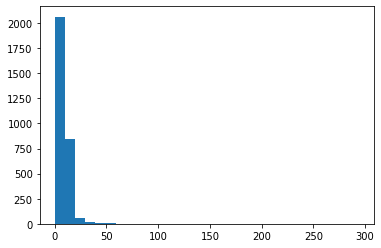

In [40]:
plt.hist(train['popularity'],30)

(array([ 51.,  53.,  74.,  86.,  93., 111.,  92., 126., 150., 225., 364.,
        410., 391., 383., 212.,  91.,  32.,  17.,  11.,   9.,   3.,   2.,
          2.,   2.,   0.,   1.,   2.,   2.,   1.,   2.]),
 array([9.99999500e-07, 1.89604873e-01, 3.79208747e-01, 5.68812620e-01,
        7.58416494e-01, 9.48020367e-01, 1.13762424e+00, 1.32722811e+00,
        1.51683199e+00, 1.70643586e+00, 1.89603973e+00, 2.08564361e+00,
        2.27524748e+00, 2.46485135e+00, 2.65445523e+00, 2.84405910e+00,
        3.03366297e+00, 3.22326685e+00, 3.41287072e+00, 3.60247459e+00,
        3.79207847e+00, 3.98168234e+00, 4.17128622e+00, 4.36089009e+00,
        4.55049396e+00, 4.74009784e+00, 4.92970171e+00, 5.11930558e+00,
        5.30890946e+00, 5.49851333e+00, 5.68811720e+00]),
 <a list of 30 Patch objects>)

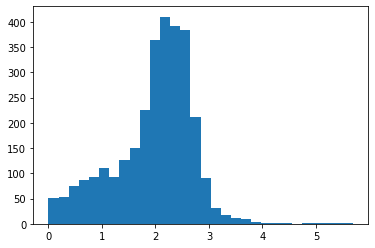

In [41]:
plt.hist(np.log1p(train['popularity']),30)

since the distribution of log looks better, let's add this as a new feature.

In [42]:
train['log_popularity']=np.log1p(train['popularity'])

### 3.9. Analyzing Production Companies
Similarly than genres, we have a dictionary with many production companies for each movie. But in this case, the number of companies is greater than the number of genres. Then we will need to choose only a set of companies (top ones) in order to encode it.

In [43]:
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ','.join(sorted([i['name'] for i in x])) if x != {} else '')

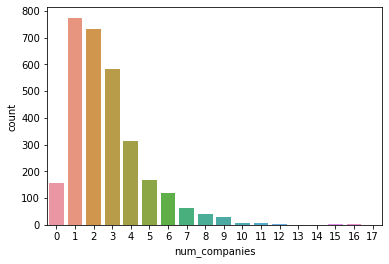

In [44]:
sns.countplot(train['num_companies'])

It shows that most of the films are produced by 1-3 companies.

In [45]:
list_companies = list(train['production_companies'].map(lambda x:[i['name'] for i in x]))
list_companies_count = []
for i in list_companies:
    for j in i:
        list_companies_count.append(j)
companies_top = Counter(list_companies_count).most_common()       
len(Counter(list_companies_count))       

3695

The film companies are made up of big companies and small ones, so the impact of different ' production companies on the box office is different, but since there are a total of 3,695 film companies, there are too many, so we only take the top 30 companies for new frequency.



Let's see the top production companies

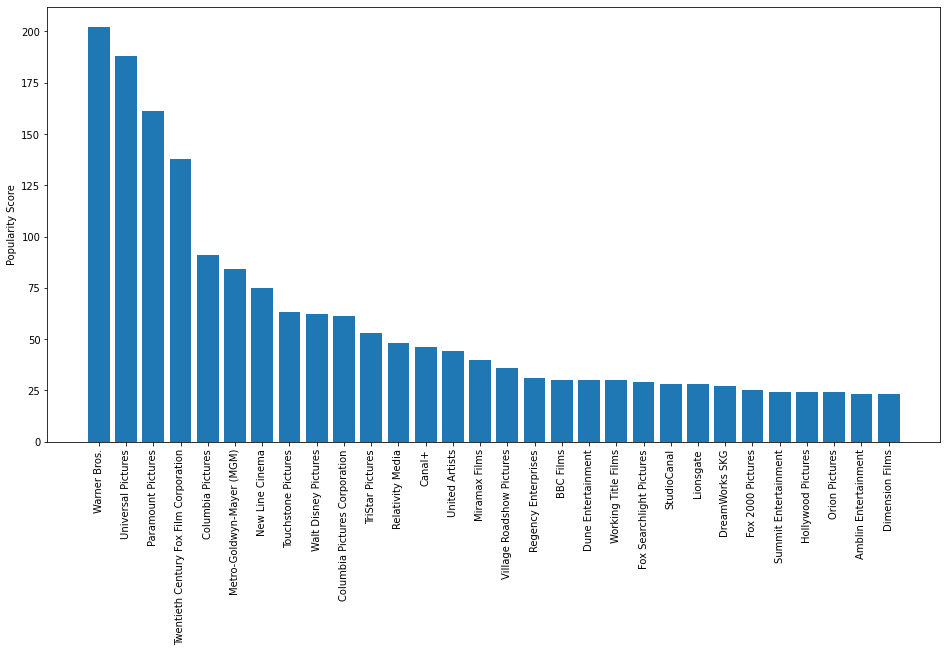

In [46]:
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
popularity_companies = Counter([i for j in list_of_companies for i in j]).most_common(30)
# sort in-place from highest to lowest
draw_top_graph(popularity_companies)

Let's use one Hot Encoding using only the 30 top companies

In [47]:
production_companies_count_list = [i[0] for i in Counter(list_companies_count).most_common(30)]
for i in production_companies_count_list:
    train['companies_' + i] = train['all_production_companies'].map(lambda x:1 if i in x else 0 )

### 3.10. Analyzing Production Countries 

Since the information of this column is very related to production companies and we are already using production companies as a feature. We will drop it.

In [48]:
train=train.drop(['production_countries'],axis=1)

### 3.11. Analyzing Release Date

We think that the day, or the month of release can influence success of a movie. Also, we can evaluate the quarter to analyze the season. Then let's extract these features.

In [49]:
def func_one(x):
    if x<=3:
        return 1
    elif x<=6:
        return 2
    elif x<=9:
        return 3
    else:
        return 4

In [50]:
train['release_year'] = train['release_date'].map(lambda x:parse(x).year)
train['release_month'] = train['release_date'].map(lambda x:parse(x).month)
train['release_day'] = train['release_date'].map(lambda x:parse(x).day)
train['release_weekday']  = train['release_date'].map(lambda x:parse(x).isoweekday())
train['release_quarter']  = train['release_month'].map(func_one)


**Attention**, if it is 08/06/61, it is 1961 rather than 2061, so we have to ensure that all the values are less than 2019. So we use the year - 2019  



In [51]:
def fun_year(x):
    if x>2019:
        x = x-100
    return x

train['release_year'] = train['release_year'].map(fun_year)



### 3.12. Analyzing Runtime

This is the duration of film, some of the value were nan or zero, that does not mean the runtime is zero. We guess it is the problem when collect the data.

Most of the runtime of film are around 120, the distribution of the runtime is follow normal distribution.

In [52]:
train['runtime'].value_counts().sort_index(axis=0)

0.0      12
11.0      1
40.0      2
53.0      1
60.0      1
         ..
214.0     1
219.0     1
220.0     1
248.0     1
338.0     1
Name: runtime, Length: 139, dtype: int64

There exist 12 movies with 0 runtime, we will change it by the mean value.

In [53]:
train['runtime']=train['runtime'].replace(0,train['runtime'].mean())

(array([  1.,   0.,   2.,   1.,   5.,  34., 246., 797., 768., 439., 339.,
        178.,  67.,  61.,  23.,  17.,  10.,   3.,   3.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 11. ,  21.9,  32.8,  43.7,  54.6,  65.5,  76.4,  87.3,  98.2,
        109.1, 120. , 130.9, 141.8, 152.7, 163.6, 174.5, 185.4, 196.3,
        207.2, 218.1, 229. , 239.9, 250.8, 261.7, 272.6, 283.5, 294.4,
        305.3, 316.2, 327.1, 338. ]),
 <a list of 30 Patch objects>)

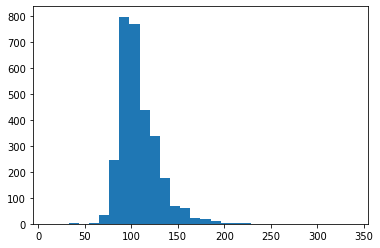

In [54]:
plt.hist(train['runtime'],30)

### 3.13. Analyzing Spoken language

Let's see the combination of spoken languages we have in this column

In [55]:
train['spoken_languages'].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

Let's extract the number of values and the languages in different columns, similar as we did before.

In [56]:
train['spoken_languages_num'] = train['spoken_languages'].map(lambda x:len(x) if x!={} else 0)
train['spoken_languages_all'] = train['spoken_languages'].map(lambda x:','.join([i['iso_639_1'] for i in x]))

Let's see which are the popular languages

In [57]:
list_spoken_languages = list(train['spoken_languages'].map(lambda x:[i['iso_639_1'] for i in x]))

list_spoken_languages_count = []
for i in list_spoken_languages:
    for j in i:
        list_spoken_languages_count.append(j)

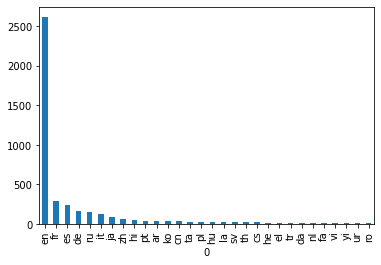

In [58]:
pd.DataFrame(Counter(list_spoken_languages_count).most_common(30)).set_index([0]).iloc[:,0].plot(kind='bar')

We observe that the most popular language is english, followed by french with a big difference. Then we can select the 10 more popular values to use with one hot encoding.

In [59]:
languages_top = Counter(list_spoken_languages_count).most_common()

In [60]:
spoken_languages_count_unique_top_10= [i[0] for i in Counter(list_spoken_languages_count).most_common(10)]

In [61]:
#train
for i in spoken_languages_count_unique_top_10:
    train['spoken_languages_' + i] = train['spoken_languages_all'].map(lambda x:1 if i in x else 0 )

### 3.14. Analyzing status 

It can be seen that most of the movies are released, so in this column we divide the status of the movie into Released and other two situations, then 1 is Released and 0 is other

In [62]:
train['status'].value_counts()

Released    2994
Rumored        4
Name: status, dtype: int64

There exist only 4 movies that are Rumored, let's take a look into them

In [63]:
pd.set_option('display.max_columns', None)
train.loc[train['status']=='Rumored']

,id,budget,genres,popularity,production_companies,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,num_genres,all_genres,genres_Comedy,genres_Drama,genres_Family,genres_Romance,genres_Thriller,genres_Action,genres_Animation,genres_Adventure,genres_Horror,genres_Documentary,genres_Music,genres_Crime,genres_Science Fiction,genres_Mystery,genres_Foreign,genres_Fantasy,genres_War,genres_Western,genres_History,genres_TV Movie,has_homepage,title_lenght,log_popularity,num_companies,all_production_companies,companies_Warner Bros.,companies_Universal Pictures,companies_Paramount Pictures,companies_Twentieth Century Fox Film Corporation,companies_Columbia Pictures,companies_Metro-Goldwyn-Mayer (MGM),companies_New Line Cinema,companies_Touchstone Pictures,companies_Walt Disney Pictures,companies_Columbia Pictures Corporation,companies_TriStar Pictures,companies_Relativity Media,companies_Canal+,companies_United Artists,companies_Miramax Films,companies_Village Roadshow Pictures,companies_Regency Enterprises,companies_BBC Films,companies_Dune Entertainment,companies_Working Title Films,companies_Fox Searchlight Pictures,companies_StudioCanal,companies_Lionsgate,companies_DreamWorks SKG,companies_Fox 2000 Pictures,companies_Summit Entertainment,companies_Hollywood Pictures,companies_Orion Pictures,companies_Amblin Entertainment,companies_Dimension Films,release_year,release_month,release_day,release_weekday,release_quarter,spoken_languages_num,spoken_languages_all,spoken_languages_en,spoken_languages_fr,spoken_languages_es,spoken_languages_de,spoken_languages_ru,spoken_languages_it,spoken_languages_ja,spoken_languages_zh,spoken_languages_hi,spoken_languages_pt
609,610,2.254436e+07,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",5.121309,{},1/1/97,71.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Rumored,It Will Take All Her Magic to Rescue Her Friends!,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644,1,4,"[Fantasy, Animation, Romance, Family]",0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,46,1.811776,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1997,1,1,3,1,8,"da,en,fi,de,no,pl,es,sv",1,0,1,1,0,0,0,0,0,0
1007,1008,2.254436e+07,"[{'id': 35, 'name': 'Comedy'}]",0.007877,{},2/5/11,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,,Billy Gardell: Halftime,{},"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60,0,1,[Comedy],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0.007846,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,2,5,6,1,1,en,1,0,0,0,0,0,0,0,0,0
1216,1217,2.254436e+07,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",10.273979,"[{'name': 'Atlantic Entertainment Group', 'id'...",8/22/86,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,"When fear made her a victim, she turned fear i...",Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091,0,2,"[Drama, Thriller]",0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2.422497,1,Atlantic Entertainment Group,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1986,8,22,5,3,1,en,1,0,0,0,0,0,0,0,0,0
1618,1619,8.910000e+05,"[{'id': 99, 'name': 'Documentary'}]",0.179246,{},2/20/98,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,Inside the world's first postmodern revolution,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000,0,1,[Documentary],0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,22,0.164875,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1998,2,20,5,1,2,"en,es",1,0,1,0,0,0,0,0,0,0


Let's use a binary enconding to treat this information.

In [64]:
train['has_Released'] = train['status'].map(lambda x:1 if x=='Released' else 0)


### 3.15. Analyzing tagline

The tagline of a film is like the promotion slogan, we suppose that if a film have a tagline, the film would be more attractive

In [65]:
train['tagline'].value_counts().sort_index(axis=0)

                                                                 595
"Come up and see me sometime - any time!"                          1
"Happiness Must Be Earned"                                         1
"It goes places movies seldom dare to go."                         1
"Just remember...A WOMAN'S BULLETS KILL AS QUICK AS A MAN'S!"      1
                                                                ... 
full on - all night - come on                                      1
kurd                                                               1
the few, the proud, the paroled.                                   1
«You're invited to the wedding of the season»                      1
最后的舞者                                                              1
Name: tagline, Length: 2401, dtype: int64

In [66]:
train['has_tagline'] = train['tagline'].map(lambda x:0 if x=='' else 1)

In [67]:
train=train.drop(['tagline'],axis=1)

### 3.16. Analyzing Title

We already analyze Original Title column on 6. Then we can drop this column.

In [68]:
train=train.drop(['title'],axis=1)

### 3.17. Analyzing Keywords

Different keywords are assigned to movies. This may help the movie to be more easy to find. Then we can explore the number of keywords a movie has and which are those keywords.

In [69]:
train['Keywords']

0       [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1       [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2       [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3       [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                      {}
                              ...                        
2995    [{'id': 378, 'name': 'prison'}, {'id': 572, 'n...
2996    [{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...
2997    [{'id': 441, 'name': 'assassination'}, {'id': ...
2998    [{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...
2999    [{'id': 591, 'name': 'cia'}, {'id': 822, 'name...
Name: Keywords, Length: 2998, dtype: object

In [70]:
train['Keywords_num'] = train['Keywords'].map(lambda x:len(x) if x!={} else 0)
train['Keywords_all'] = train['Keywords'].map(lambda x:','.join([i['name'] for i in x]))

In [71]:
list_Keywords = list(train['Keywords'].map(lambda x:[i['name'] for i in x]))

list_Keywords_count = []
for i in list_Keywords:
    for j in i:
        list_Keywords_count.append(j)

In [72]:
keywords_top = Counter( list_Keywords_count).most_common()

Let's take a look into a wordcloud of the keywords

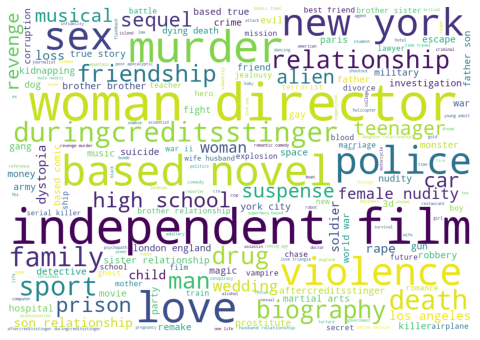

In [73]:
fig,ax=plt.subplots(figsize=(12,6))
w = WordCloud( \
    width = 1000, height = 700,
    background_color = "white",
    collocations=True
    ).generate(','.join(list_Keywords_count))
plt.imshow(w)
plt.xticks([])
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

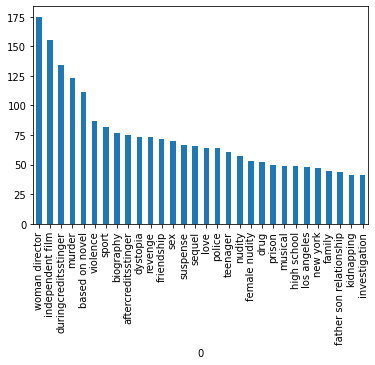

In [74]:
pd.DataFrame(Counter(list_Keywords_count).most_common(30)).set_index([0]).iloc[:,0].plot(kind='bar')

We observe that 'women director' is the most popular keyword, followed by 'independent film' and then 'duringcredistinger'

Let's use this 30 keywords as features and let's encode using one hot encoding

In [75]:
list_Key_unique_top_30= [i[0] for i in Counter(list_Keywords_count).most_common(30)]

In [76]:
for i in list(list_Key_unique_top_30):
    train['Keywords_'+i] = train['Keywords_all'].map(lambda x:1 if i in x else 0)


### 3.18. Analyzing the Cast

The greater the number of actors, the greater the investment in the movie, so a new column is also required to determine the number of actors in the movie.
We would like to find the most 30 famous actors, to check how it will influence the film revenue

In [77]:
train['cast_num'] = train['cast'].map(lambda x:len(x) if x!={} else 0)
train['cast_all'] = train['cast'].map(lambda x:','.join([i['name'] for i in x]))


In [78]:
list_cast = list(train['cast'].map(lambda x:[i['name'] for i in x]))

list_cast_count = []
for i in list_cast:
    for j in i:
        list_cast_count.append(j)

In [79]:
list_cast_unique_top_30 = [i[0] for i in Counter(list_cast_count).most_common(30)]

In [80]:
for i in list(list_cast_unique_top_30 ):
    train['cast_'+i] = train['cast_all'].map(lambda x:1 if i in x else 0)


Let's analyze the gender of the cast, this could have some influence

In [81]:
train['gender_0_Cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['gender_1_Cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['gender_2_Cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))


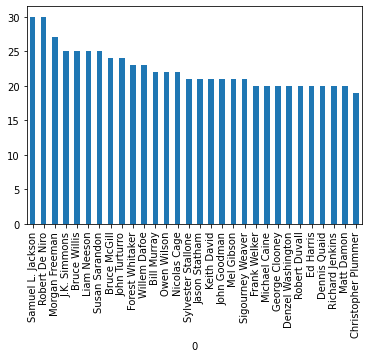

In [82]:
pd.DataFrame(Counter(list_cast_count).most_common(30)).set_index([0]).iloc[:,0].plot(kind='bar')

### 3.19. Analyzing the Crew

We do a similar analysis we did before

In [83]:
train['crew_name']=train['crew']

In [84]:
train['crew_num'] = train['crew'].map(lambda x:len(x) if x!={} else 0)
train['crew_all'] = train['crew'].map(lambda x:','.join([i['name'] for i in x]))
train['crew_department_all'] = train['crew'].map(lambda x:','.join([i['department'] for i in x]))


In [85]:
list_crew = list(train['crew'].map(lambda x:[i['name'] for i in x]))

list_crew_count = []

for i in list_crew:
    for j in i:
        list_crew_count.append(j)
        
list_crew_count_top_30 = [i[0] for i in Counter(list_crew_count).most_common(30)]

for i in list(list_crew_count_top_30):
    train['cast_'+i] = train['cast_all'].map(lambda x:1 if i in x else 0)


In [86]:
list_department = list(train['crew'].map(lambda x:[i['department'] for i in x]))

list_department_count = []

for i in list_department:
    for j in i:
        list_department_count.append(j)

department_top = Counter( list_department_count).most_common()
list_department_count_unique = [i[0] for i in Counter(list_department_count).most_common()]

for i in list(list_department_count_unique):
    train['department_'+i] = train['crew_department_all'].map(lambda x:1 if i in x else 0)


## 4. Feature Engineering

In [87]:
train.shape

(2998, 203)

After doing the preprocessing, we obtained 202 features.  In this section, we will do some statistic analysis and try to propose new variables. In order to reduce the number of features to work, we will chose the best features in the next section.

Let's take a look in the whole dataset

In [88]:
train.head(5)

,id,budget,genres,popularity,production_companies,release_date,runtime,spoken_languages,status,Keywords,cast,crew,revenue,has_collection,num_genres,all_genres,genres_Comedy,genres_Drama,genres_Family,genres_Romance,genres_Thriller,genres_Action,genres_Animation,genres_Adventure,genres_Horror,genres_Documentary,genres_Music,genres_Crime,genres_Science Fiction,genres_Mystery,genres_Foreign,genres_Fantasy,genres_War,genres_Western,genres_History,genres_TV Movie,has_homepage,title_lenght,log_popularity,num_companies,all_production_companies,companies_Warner Bros.,companies_Universal Pictures,companies_Paramount Pictures,companies_Twentieth Century Fox Film Corporation,companies_Columbia Pictures,companies_Metro-Goldwyn-Mayer (MGM),companies_New Line Cinema,companies_Touchstone Pictures,companies_Walt Disney Pictures,companies_Columbia Pictures Corporation,companies_TriStar Pictures,companies_Relativity Media,companies_Canal+,companies_United Artists,companies_Miramax Films,companies_Village Roadshow Pictures,companies_Regency Enterprises,companies_BBC Films,companies_Dune Entertainment,companies_Working Title Films,companies_Fox Searchlight Pictures,companies_StudioCanal,companies_Lionsgate,companies_DreamWorks SKG,companies_Fox 2000 Pictures,companies_Summit Entertainment,companies_Hollywood Pictures,companies_Orion Pictures,companies_Amblin Entertainment,companies_Dimension Films,release_year,release_month,release_day,release_weekday,release_quarter,spoken_languages_num,spoken_languages_all,spoken_languages_en,spoken_languages_fr,spoken_languages_es,spoken_languages_de,spoken_languages_ru,spoken_languages_it,spoken_languages_ja,spoken_languages_zh,spoken_languages_hi,spoken_languages_pt,has_Released,has_tagline,Keywords_num,Keywords_all,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_dystopia,Keywords_revenge,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_love,Keywords_police,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_musical,Keywords_high school,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_kidnapping,Keywords_investigation,cast_num,cast_all,cast_Samuel L. Jackson,cast_Robert De Niro,cast_Morgan Freeman,cast_J.K. Simmons,cast_Bruce Willis,cast_Liam Neeson,cast_Susan Sarandon,cast_Bruce McGill,cast_John Turturro,cast_Forest Whitaker,cast_Willem Dafoe,cast_Bill Murray,cast_Owen Wilson,cast_Nicolas Cage,cast_Sylvester Stallone,cast_Jason Statham,cast_Keith David,cast_John Goodman,cast_Mel Gibson,cast_Sigourney Weaver,cast_Frank Welker,cast_Michael Caine,cast_George Clooney,cast_Denzel Washington,cast_Robert Duvall,cast_Ed Harris,cast_Dennis Quaid,cast_Richard Jenkins,cast_Matt Damon,cast_Christopher Plummer,gender_0_Cast,gender_1_Cast,gender_2_Cast,crew_name,crew_num,crew_all,crew_department_all,cast_Avy Kaufman,cast_Robert Rodriguez,cast_Deborah Aquila,cast_James Newton Howard,cast_Mary Vernieu,cast_Steven Spielberg,cast_Luc Besson,cast_Jerry Goldsmith,cast_Francine Maisler,cast_Tricia Wood,cast_James Horner,cast_Kerry Barden,cast_Bob Weinstein,cast_Harvey Weinstein,cast_Janet Hirshenson,cast_Jane Jenkins,cast_John Debney,cast_Hans Zimmer,cast_John Papsidera,cast_Francis Ford Coppola,cast_Billy Hopkins,cast_Danny Elfman,cast_Mindy Marin,cast_Hans Bjerno,cast_Sarah Finn,cast_Neal H. Moritz,cast_Tim Bevan,cast_Alan Silvestri,cast_Mark Isham,cast_Marco Beltrami,department_Production,department_Sound,department_Art,department_Crew,department_Writing,department_Costume & Make-Up,department_Camera,department_Directing,department_Editing,department_Visual Effects,department_Lighting,department_Actors
0,1,1.400000e+07,"[{'id': 35, 'name': 'Comedy'}]",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,"[{'iso_639_1': 'en', 'na

### 4.1. Descriptive Statistics

### 4.1.1. belongs_to_collection/homepage/tagline/released with revenue

We analyze our binary values

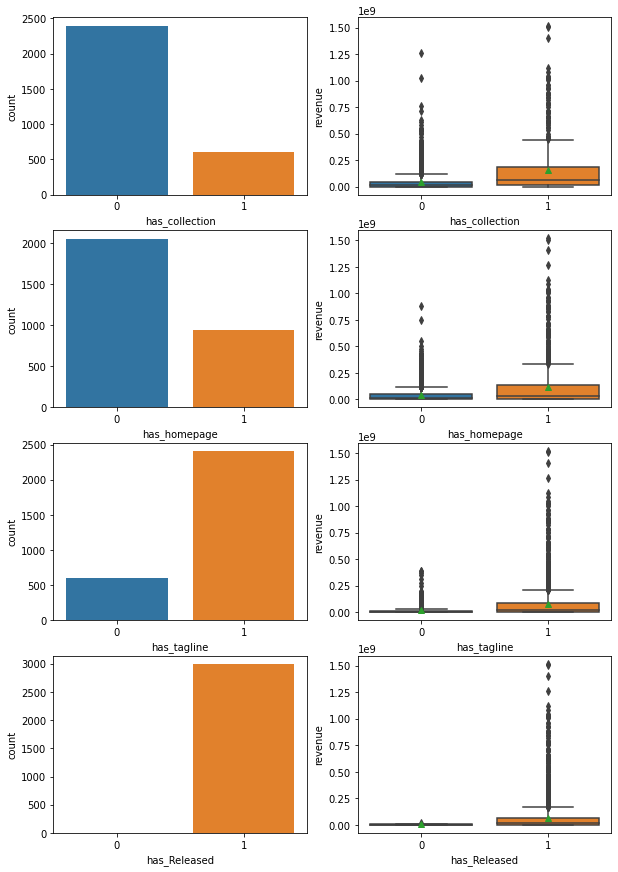

In [89]:
#%matplotlib notebook
fig = plt.figure(figsize=(10, 15))

plt.subplot2grid((4,2),(0,0))
sns.countplot(train['has_collection'])


plt.subplot2grid((4,2),(0,1))
sns.boxplot(data=train,x='has_collection',y='revenue',showmeans=True)


plt.subplot2grid((4,2),(1,0))
sns.countplot(train['has_homepage'])

plt.subplot2grid((4,2),(1,1))
sns.boxplot(data=train,x='has_homepage',y='revenue',showmeans=True)

plt.subplot2grid((4,2),(2,0))
sns.countplot(train['has_tagline'])


plt.subplot2grid((4,2),(2,1))
sns.boxplot(data=train,x='has_tagline',y='revenue',showmeans=True)

plt.subplot2grid((4,2),(3,0))
sns.countplot(train['has_Released'])


plt.subplot2grid((4,2),(3,1))
sns.boxplot(data=train,x='has_Released',y='revenue',showmeans=True)

From the above chart, we can observe the following information:

> The number of the collection movies is less than that of non-collection movies, but the box office average and median of collection movies are higher than non-collection movies

> Movies with an official homepage are fewer than movies without a homepage, but the average box office and median of movies with a homepage are higher than movies without a homepage

> Most films have tagline. Similarly, films with tagline have higher box office averages and medians than films without tagline.

> Only a few movies are non-released, and the box office average and median of released movies are higher than those of non-released movies

It is found that the box office of a series of movies is higher than the non-series movies in terms of average or median. This is easy to understand. A movie box office is very good. The company naturally wants to continue the movie and continue to make money!


### 4.1.2 Comparison Budget and Reveune

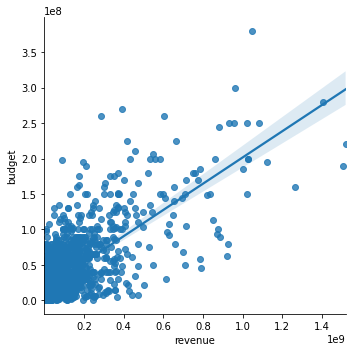

In [90]:
sns.lmplot('revenue', 'budget', data=train)
plt.show()

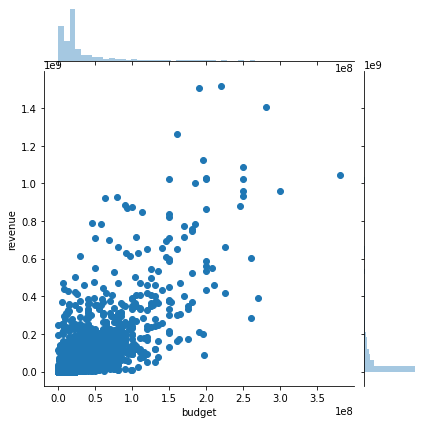

In [91]:
sns.jointplot(data=train,x='budget',y='revenue',kind='scatter')

As can be seen from the scatter plot, the vast majority of movie budgets are within 100 million. As the budget increases, the box office also shows an increasing trend, but this trend is not particularly obvious, because the box office of a movie, in addition to cost There are also many aspects such as script, actor acting, director level, publicity, etc.

### 4.1.3 Comparison Budget and Release Date

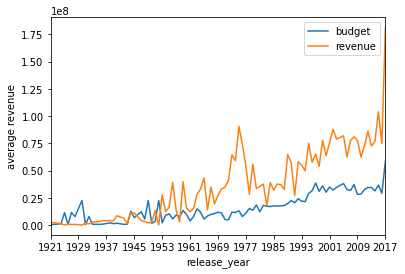

In [92]:
train.groupby(['release_year'])['budget'].agg('mean').plot()
train.groupby(['release_year'])['revenue'].agg('mean').plot()
plt.xticks(range(1921,2019,8))
plt.ylabel('average revenue')
plt.legend()


We observe that the budget and revenue have increased in the last years.

### 4.1.4 Comparison Genre and Revenue

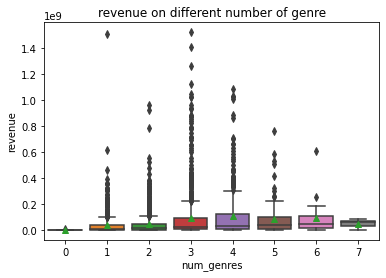

In [93]:
sns.boxplot(x='num_genres', y='revenue', data=train.loc[train['num_genres'].isin(train['num_genres'].value_counts().head(10).index)],showmeans=True);
plt.title('revenue on different number of genre');
#From the mean point of view, there is a normal distribution relationship. When the number of movie types is 4, the box office average is the highest, too much and too little, the box office will decline.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

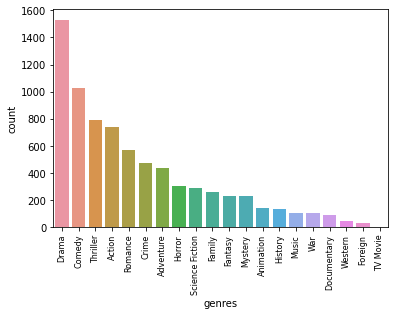

In [94]:
sns.barplot(x_val, y_val)
plt.xlabel('genres')
plt.ylabel('count')
plt.xticks(fontsize=8,rotation=90)

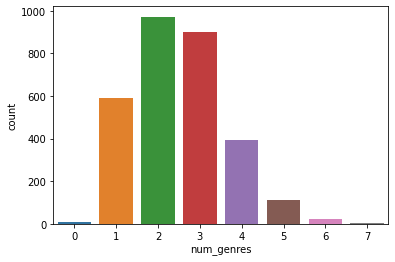

In [95]:
sns.countplot(train['num_genres'])

Let ’s take a look at which movies are the most profitable. We will judge according to the corresponding box office average of each genre. It should be noted that because a movie can belong to multiple genres, there will be duplicates. Here is why sns is not used here. The reason for .boxplot ().

In [96]:
train.info('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 203 columns):
id                                                  int64
budget                                              float64
genres                                              object
popularity                                          float64
production_companies                                object
release_date                                        object
runtime                                             float64
spoken_languages                                    object
status                                              object
Keywords                                            object
cast                                                object
crew                                                object
revenue                                             int64
has_collection                                      int64
num_genres                                          int64
all_genr

### 4.2 New features complementation

Given the evaluation we have made before. Let's propose new features.

### 4.2.1 Normalizing lenghts features

In [97]:
def normalize_function(df,column_name):
    x = df[[column_name]].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    return pd.DataFrame(x_scaled)

In [98]:

# Create x, where x the 'scores' column's values as floats
x = train[['title_lenght']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
train['title_lenght_norm'] = pd.DataFrame(x_scaled)

In [99]:
train=train.drop(['title_lenght'],axis=1)

In [100]:
#Ratio number of cast and budget
train['ratio_number_of_cast_and_budget']=train['budget']/(train['cast_num'].map(lambda x: train['cast_num'].mean() if x==0 else x))
train['ratio_number_of_cast_and_budget']=normalize_function(train,'ratio_number_of_cast_and_budget')

In [101]:
train['ratio_runtime_and_budget']=train['budget']/(train['runtime'].map(lambda x: train['cast_num'].mean() if x==0 else x))
train['ratio_runtime_and_budget']=normalize_function(train,'ratio_runtime_and_budget')

Crew Feature Engineering

In [102]:
list_of_crew_departments = list(train['crew_name'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_departments for i in j]).most_common(14)

# top director 

list_directors_name = list(train['crew_name'].apply(lambda x: [i['name'] for i in x if i['job'] == 'Director' ] if x != {} else []).values)
dict_director_names = dict(Counter([i for j in list_directors_name for i in j]))

Top_director_names_count = sum(dict_director_names.values())




In [103]:
# top producer


list_producer_name = list(train['crew_name'].apply(lambda x: [i['name'] for i in x if i['job'] == 'Producer' ] if x != {} else []).values)
dict_producer_names = dict(Counter([i for j in list_producer_name for i in j]))

Top_producer_names_count = sum(dict_producer_names.values())

In [104]:
# top Original Music Composer


list_music_composer_name = list(train['crew_name'].apply(lambda x: [i['name'] for i in x if i['job'] == 'Original Music Composer' ] if x != {} else []).values)
dict_composer_names = dict(Counter([i for j in list_music_composer_name for i in j]).most_common(15))

Top_composer_names_count = sum(dict_composer_names.values())

In [105]:
#train['num_crew'] = train['crew_name'].apply(lambda x: len(x) if x != {} else 0)

train['crew_director'] = train['crew_name'].apply(lambda x: ','.join(sorted([i['name'] for i in x if i['job'] == 'Director'])) if x != {} else '')
train['crew_director_norm'] = train['crew_director'].apply(lambda x: [(dict_director_names[i]/Top_director_names_count) if i in dict_director_names.keys() else 0 for i in x.split(',')][0] if x != '' else 0)
train['crew_director_log_norm'] = train['crew_director'].apply(lambda x: [np.log(dict_director_names[i])+1 if i in dict_director_names.keys() else 1 for i in x.split(',')][0] if x != '' else 0)

train['crew_producer'] = train['crew_name'].apply(lambda x: ','.join(sorted([i['name'] for i in x if i['job'] == 'Producer'])) if x != {} else '')
train['crew_producer_norm'] = train['crew_producer'].apply(lambda x: [(dict_producer_names[i]/Top_producer_names_count) if i in dict_producer_names.keys() else 0 for i in x.split(',')][0] if x != '' else 0)
train['crew_producer_log_norm'] = train['crew_producer'].apply(lambda x: [np.log(dict_producer_names[i])+1 if i in dict_producer_names.keys() else 1 for i in x.split(',')][0] if x != '' else 0)

train['crew_composer'] = train['crew_name'].apply(lambda x: ','.join(sorted([i['name'] for i in x if i['job'] == 'Original Music Composer'])) if x != {} else '')
train['crew_composer_norm'] = train['crew_composer'].apply(lambda x: [(dict_composer_names[i]/Top_composer_names_count) if i in dict_composer_names.keys() else 0 for i in x.split(',')][0] if x != '' else 0)
train['crew_composer_log_norm'] = train['crew_composer'].apply(lambda x: [np.log(dict_composer_names[i])+1 if i in dict_composer_names.keys() else 1 for i in x.split(',')][0] if x != '' else 0)


#############################################################################################################    

# test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)




# train = train.drop(['crew'], axis=1)
# test = test.drop(['crew'], axis=1)

In [106]:
train.head()

,id,budget,genres,popularity,production_companies,release_date,runtime,spoken_languages,status,Keywords,cast,crew,revenue,has_collection,num_genres,all_genres,genres_Comedy,genres_Drama,genres_Family,genres_Romance,genres_Thriller,genres_Action,genres_Animation,genres_Adventure,genres_Horror,genres_Documentary,genres_Music,genres_Crime,genres_Science Fiction,genres_Mystery,genres_Foreign,genres_Fantasy,genres_War,genres_Western,genres_History,genres_TV Movie,has_homepage,log_popularity,num_companies,all_production_companies,companies_Warner Bros.,companies_Universal Pictures,companies_Paramount Pictures,companies_Twentieth Century Fox Film Corporation,companies_Columbia Pictures,companies_Metro-Goldwyn-Mayer (MGM),companies_New Line Cinema,companies_Touchstone Pictures,companies_Walt Disney Pictures,companies_Columbia Pictures Corporation,companies_TriStar Pictures,companies_Relativity Media,companies_Canal+,companies_United Artists,companies_Miramax Films,companies_Village Roadshow Pictures,companies_Regency Enterprises,companies_BBC Films,companies_Dune Entertainment,companies_Working Title Films,companies_Fox Searchlight Pictures,companies_StudioCanal,companies_Lionsgate,companies_DreamWorks SKG,companies_Fox 2000 Pictures,companies_Summit Entertainment,companies_Hollywood Pictures,companies_Orion Pictures,companies_Amblin Entertainment,companies_Dimension Films,release_year,release_month,release_day,release_weekday,release_quarter,spoken_languages_num,spoken_languages_all,spoken_languages_en,spoken_languages_fr,spoken_languages_es,spoken_languages_de,spoken_languages_ru,spoken_languages_it,spoken_languages_ja,spoken_languages_zh,spoken_languages_hi,spoken_languages_pt,has_Released,has_tagline,Keywords_num,Keywords_all,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_dystopia,Keywords_revenge,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_love,Keywords_police,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_musical,Keywords_high school,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_kidnapping,Keywords_investigation,cast_num,cast_all,cast_Samuel L. Jackson,cast_Robert De Niro,cast_Morgan Freeman,cast_J.K. Simmons,cast_Bruce Willis,cast_Liam Neeson,cast_Susan Sarandon,cast_Bruce McGill,cast_John Turturro,cast_Forest Whitaker,cast_Willem Dafoe,cast_Bill Murray,cast_Owen Wilson,cast_Nicolas Cage,cast_Sylvester Stallone,cast_Jason Statham,cast_Keith David,cast_John Goodman,cast_Mel Gibson,cast_Sigourney Weaver,cast_Frank Welker,cast_Michael Caine,cast_George Clooney,cast_Denzel Washington,cast_Robert Duvall,cast_Ed Harris,cast_Dennis Quaid,cast_Richard Jenkins,cast_Matt Damon,cast_Christopher Plummer,gender_0_Cast,gender_1_Cast,gender_2_Cast,crew_name,crew_num,crew_all,crew_department_all,cast_Avy Kaufman,cast_Robert Rodriguez,cast_Deborah Aquila,cast_James Newton Howard,cast_Mary Vernieu,cast_Steven Spielberg,cast_Luc Besson,cast_Jerry Goldsmith,cast_Francine Maisler,cast_Tricia Wood,cast_James Horner,cast_Kerry Barden,cast_Bob Weinstein,cast_Harvey Weinstein,cast_Janet Hirshenson,cast_Jane Jenkins,cast_John Debney,cast_Hans Zimmer,cast_John Papsidera,cast_Francis Ford Coppola,cast_Billy Hopkins,cast_Danny Elfman,cast_Mindy Marin,cast_Hans Bjerno,cast_Sarah Finn,cast_Neal H. Moritz,cast_Tim Bevan,cast_Alan Silvestri,cast_Mark Isham,cast_Marco Beltrami,department_Production,department_Sound,department_Art,department_Crew,department_Writing,department_Costume & Make-Up,department_Camera,department_Directing,department_Editing,department_Visual Effects,department_Lighting,department_Actors,title_lenght_norm,ratio_number_of_cast_and_budget,ratio_runtime_and_budget,crew_director,crew_director_norm,crew_director_log_norm,crew_producer,crew_producer_nor

In [107]:
train.shape

(2998, 214)

In [108]:
train.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [109]:
train.dtypes[train.dtypes=='int64']

id                           int64
revenue                      int64
has_collection               int64
num_genres                   int64
genres_Comedy                int64
                             ...  
department_Directing         int64
department_Editing           int64
department_Visual Effects    int64
department_Lighting          int64
department_Actors            int64
Length: 182, dtype: object

In [110]:
train.dtypes[train.dtypes=='float64']

budget                             float64
popularity                         float64
runtime                            float64
log_popularity                     float64
title_lenght_norm                  float64
ratio_number_of_cast_and_budget    float64
ratio_runtime_and_budget           float64
crew_director_norm                 float64
crew_director_log_norm             float64
crew_producer_norm                 float64
crew_producer_log_norm             float64
crew_composer_norm                 float64
crew_composer_log_norm             float64
dtype: object

In [111]:
train.dtypes[train.dtypes=='uint8']

Series([], dtype: object)

In [112]:
train.dtypes[train.dtypes=='<M8[ns]']

Series([], dtype: object)

In [113]:
train.dtypes[train.dtypes=='O']

genres                      object
production_companies        object
release_date                object
spoken_languages            object
status                      object
Keywords                    object
cast                        object
crew                        object
all_genres                  object
all_production_companies    object
spoken_languages_all        object
Keywords_all                object
cast_all                    object
crew_name                   object
crew_all                    object
crew_department_all         object
crew_director               object
crew_producer               object
crew_composer               object
dtype: object

In [114]:
train = train.select_dtypes(include=['int64','float64','uint8'])

In [115]:
train.shape

(2998, 195)

In [116]:
train.head()

,id,budget,popularity,runtime,revenue,has_collection,num_genres,genres_Comedy,genres_Drama,genres_Family,genres_Romance,genres_Thriller,genres_Action,genres_Animation,genres_Adventure,genres_Horror,genres_Documentary,genres_Music,genres_Crime,genres_Science Fiction,genres_Mystery,genres_Foreign,genres_Fantasy,genres_War,genres_Western,genres_History,genres_TV Movie,has_homepage,log_popularity,num_companies,companies_Warner Bros.,companies_Universal Pictures,companies_Paramount Pictures,companies_Twentieth Century Fox Film Corporation,companies_Columbia Pictures,companies_Metro-Goldwyn-Mayer (MGM),companies_New Line Cinema,companies_Touchstone Pictures,companies_Walt Disney Pictures,companies_Columbia Pictures Corporation,companies_TriStar Pictures,companies_Relativity Media,companies_Canal+,companies_United Artists,companies_Miramax Films,companies_Village Roadshow Pictures,companies_Regency Enterprises,companies_BBC Films,companies_Dune Entertainment,companies_Working Title Films,companies_Fox Searchlight Pictures,companies_StudioCanal,companies_Lionsgate,companies_DreamWorks SKG,companies_Fox 2000 Pictures,companies_Summit Entertainment,companies_Hollywood Pictures,companies_Orion Pictures,companies_Amblin Entertainment,companies_Dimension Films,release_year,release_month,release_day,release_weekday,release_quarter,spoken_languages_num,spoken_languages_en,spoken_languages_fr,spoken_languages_es,spoken_languages_de,spoken_languages_ru,spoken_languages_it,spoken_languages_ja,spoken_languages_zh,spoken_languages_hi,spoken_languages_pt,has_Released,has_tagline,Keywords_num,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_dystopia,Keywords_revenge,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_love,Keywords_police,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_musical,Keywords_high school,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_kidnapping,Keywords_investigation,cast_num,cast_Samuel L. Jackson,cast_Robert De Niro,cast_Morgan Freeman,cast_J.K. Simmons,cast_Bruce Willis,cast_Liam Neeson,cast_Susan Sarandon,cast_Bruce McGill,cast_John Turturro,cast_Forest Whitaker,cast_Willem Dafoe,cast_Bill Murray,cast_Owen Wilson,cast_Nicolas Cage,cast_Sylvester Stallone,cast_Jason Statham,cast_Keith David,cast_John Goodman,cast_Mel Gibson,cast_Sigourney Weaver,cast_Frank Welker,cast_Michael Caine,cast_George Clooney,cast_Denzel Washington,cast_Robert Duvall,cast_Ed Harris,cast_Dennis Quaid,cast_Richard Jenkins,cast_Matt Damon,cast_Christopher Plummer,gender_0_Cast,gender_1_Cast,gender_2_Cast,crew_num,cast_Avy Kaufman,cast_Robert Rodriguez,cast_Deborah Aquila,cast_James Newton Howard,cast_Mary Vernieu,cast_Steven Spielberg,cast_Luc Besson,cast_Jerry Goldsmith,cast_Francine Maisler,cast_Tricia Wood,cast_James Horner,cast_Kerry Barden,cast_Bob Weinstein,cast_Harvey Weinstein,cast_Janet Hirshenson,cast_Jane Jenkins,cast_John Debney,cast_Hans Zimmer,cast_John Papsidera,cast_Francis Ford Coppola,cast_Billy Hopkins,cast_Danny Elfman,cast_Mindy Marin,cast_Hans Bjerno,cast_Sarah Finn,cast_Neal H. Moritz,cast_Tim Bevan,cast_Alan Silvestri,cast_Mark Isham,cast_Marco Beltrami,department_Production,department_Sound,department_Art,department_Crew,department_Writing,department_Costume & Make-Up,department_Camera,department_Directing,department_Editing,department_Visual Effects,department_Lighting,department_Actors,title_lenght_norm,ratio_number_of_cast_and_budget,ratio_runtime_and_budget,crew_director_norm,crew_director_log_norm,crew_producer_norm,crew_producer_log_norm,crew_composer_norm,crew_composer_log_norm
0,1,1.400000e+07,6.575393,93.0,12314651,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.024905,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,2

In [117]:
train.isna().sum()

id                        0
budget                    0
popularity                0
runtime                   0
revenue                   0
                         ..
crew_director_log_norm    0
crew_producer_norm        0
crew_producer_log_norm    0
crew_composer_norm        0
crew_composer_log_norm    0
Length: 195, dtype: int64

In [118]:
train.fillna(0, inplace=True)

In [119]:
corr_matrix = train.iloc[:,1:].corr().abs()
corr_matrix.head()

,budget,popularity,runtime,revenue,has_collection,num_genres,genres_Comedy,genres_Drama,genres_Family,genres_Romance,genres_Thriller,genres_Action,genres_Animation,genres_Adventure,genres_Horror,genres_Documentary,genres_Music,genres_Crime,genres_Science Fiction,genres_Mystery,genres_Foreign,genres_Fantasy,genres_War,genres_Western,genres_History,genres_TV Movie,has_homepage,log_popularity,num_companies,companies_Warner Bros.,companies_Universal Pictures,companies_Paramount Pictures,companies_Twentieth Century Fox Film Corporation,companies_Columbia Pictures,companies_Metro-Goldwyn-Mayer (MGM),companies_New Line Cinema,companies_Touchstone Pictures,companies_Walt Disney Pictures,companies_Columbia Pictures Corporation,companies_TriStar Pictures,companies_Relativity Media,companies_Canal+,companies_United Artists,companies_Miramax Films,companies_Village Roadshow Pictures,companies_Regency Enterprises,companies_BBC Films,companies_Dune Entertainment,companies_Working Title Films,companies_Fox Searchlight Pictures,companies_StudioCanal,companies_Lionsgate,companies_DreamWorks SKG,companies_Fox 2000 Pictures,companies_Summit Entertainment,companies_Hollywood Pictures,companies_Orion Pictures,companies_Amblin Entertainment,companies_Dimension Films,release_year,release_month,release_day,release_weekday,release_quarter,spoken_languages_num,spoken_languages_en,spoken_languages_fr,spoken_languages_es,spoken_languages_de,spoken_languages_ru,spoken_languages_it,spoken_languages_ja,spoken_languages_zh,spoken_languages_hi,spoken_languages_pt,has_Released,has_tagline,Keywords_num,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_dystopia,Keywords_revenge,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_love,Keywords_police,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_musical,Keywords_high school,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_kidnapping,Keywords_investigation,cast_num,cast_Samuel L. Jackson,cast_Robert De Niro,cast_Morgan Freeman,cast_J.K. Simmons,cast_Bruce Willis,cast_Liam Neeson,cast_Susan Sarandon,cast_Bruce McGill,cast_John Turturro,cast_Forest Whitaker,cast_Willem Dafoe,cast_Bill Murray,cast_Owen Wilson,cast_Nicolas Cage,cast_Sylvester Stallone,cast_Jason Statham,cast_Keith David,cast_John Goodman,cast_Mel Gibson,cast_Sigourney Weaver,cast_Frank Welker,cast_Michael Caine,cast_George Clooney,cast_Denzel Washington,cast_Robert Duvall,cast_Ed Harris,cast_Dennis Quaid,cast_Richard Jenkins,cast_Matt Damon,cast_Christopher Plummer,gender_0_Cast,gender_1_Cast,gender_2_Cast,crew_num,cast_Avy Kaufman,cast_Robert Rodriguez,cast_Deborah Aquila,cast_James Newton Howard,cast_Mary Vernieu,cast_Steven Spielberg,cast_Luc Besson,cast_Jerry Goldsmith,cast_Francine Maisler,cast_Tricia Wood,cast_James Horner,cast_Kerry Barden,cast_Bob Weinstein,cast_Harvey Weinstein,cast_Janet Hirshenson,cast_Jane Jenkins,cast_John Debney,cast_Hans Zimmer,cast_John Papsidera,cast_Francis Ford Coppola,cast_Billy Hopkins,cast_Danny Elfman,cast_Mindy Marin,cast_Hans Bjerno,cast_Sarah Finn,cast_Neal H. Moritz,cast_Tim Bevan,cast_Alan Silvestri,cast_Mark Isham,cast_Marco Beltrami,department_Production,department_Sound,department_Art,department_Crew,department_Writing,department_Costume & Make-Up,department_Camera,department_Directing,department_Editing,department_Visual Effects,department_Lighting,department_Actors,title_lenght_norm,ratio_number_of_cast_and_budget,ratio_runtime_and_budget,crew_director_norm,crew_director_log_norm,crew_producer_norm,crew_producer_log_norm,crew_composer_norm,crew_composer_log_norm
budget,1.000000,0.317775,0.209141,0.736067,0.207399,0.203388,0.063117,0.158158,0.169762,0.092859,0.037242,0.259721,0.123822,0.344481,0.087786,0.051971,0.045649,0.0055

In [120]:
corr_matrix['revenue'].isna().sum()

26

# Feature Selection

### Filter Methods

> In order to avoid overfitting the model and also reduce training time, we apply some feature selection methods to find the features that are important for training the model. https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

#### Pearson Correlation

In [121]:
import_features_list = dict()

In [122]:
number_of_features = 87

In [123]:
train_new =train
y = np.log1p(train_new['revenue'])
X = train_new.drop(['id','revenue'], axis=1)

In [124]:
def cor_selector(X, y):
    feature_name = X.columns.tolist()
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-number_of_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


In [125]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')
import_features_list['pearson_correlation']= cor_feature

100 selected features


/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


### Wrapper Methods

#### Forward Selection

In [126]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)

In [127]:
train_new =train
y = np.log1p(train_new['revenue'])
X = train_new.drop(['id','revenue'], axis=1)

In [128]:
sfs = SFS(LinearRegression(),k_features=number_of_features,forward=True,floating=False,
           scoring = 'r2',cv = 0)
sfs.fit(X, y)
print('Forward Selection Best Features')
print()
print(list(sfs.k_feature_names_))
import_features_list['forward_selection']= list(sfs.k_feature_names_)

print(str(len(sfs.k_feature_names_)), 'selected features')

Forward Selection Best Features

['budget', 'popularity', 'runtime', 'has_collection', 'num_genres', 'genres_Comedy', 'genres_Drama', 'genres_Family', 'genres_Thriller', 'genres_Animation', 'genres_Horror', 'genres_Documentary', 'genres_Crime', 'genres_Science Fiction', 'genres_Mystery', 'genres_Foreign', 'genres_Western', 'genres_TV Movie', 'has_homepage', 'log_popularity', 'companies_Warner Bros.', 'companies_Universal Pictures', 'companies_Paramount Pictures', 'companies_Twentieth Century Fox Film Corporation', 'companies_Columbia Pictures', 'companies_Metro-Goldwyn-Mayer (MGM)', 'companies_New Line Cinema', 'companies_Touchstone Pictures', 'companies_Walt Disney Pictures', 'companies_Columbia Pictures Corporation', 'companies_TriStar Pictures', 'companies_Relativity Media', 'companies_Canal+', 'companies_United Artists', 'companies_Miramax Films', 'companies_Village Roadshow Pictures', 'companies_Regency Enterprises', 'companies_Dune Entertainment', 'companies_Working Title Films',

### Embedded Method

#### Random Forest Regressor

Random Forest Regresser has an embedded feature selection feature which gives each feature a score which signifies it's importance.

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [130]:
rf = SelectFromModel(RandomForestRegressor(n_estimators = number_of_features),threshold='1.25*median')
rf.fit(X, y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                war

In [131]:
rf_support = rf.get_support()
rf_feature = X.loc[:,rf_support].columns.tolist()
print(str(len(rf_feature)), 'selected features')

91 selected features


In [132]:
import_features_list['random_forest_regressor']= rf_feature

In [133]:
import_features_list

{'pearson_correlation': ['release_year',
  'spoken_languages_es',
  'cast_Mel Gibson',
  'genres_Mystery',
  'Keywords_father son relationship',
  'companies_Summit Entertainment',
  'Keywords_nudity',
  'department_Directing',
  'companies_United Artists',
  'cast_Liam Neeson',
  'companies_Columbia Pictures Corporation',
  'cast_Bill Murray',
  'cast_Matt Damon',
  'cast_Michael Caine',
  'Keywords_revenge',
  'cast_Denzel Washington',
  'genres_Crime',
  'cast_Owen Wilson',
  'release_weekday',
  'cast_Sigourney Weaver',
  'Keywords_sport',
  'cast_Morgan Freeman',
  'Keywords_prison',
  'Keywords_violence',
  'cast_Jason Statham',
  'has_Released',
  'cast_John Goodman',
  'Keywords_los angeles',
  'companies_Working Title Films',
  'genres_Thriller',
  'cast_Frank Welker',
  'companies_Fox 2000 Pictures',
  'companies_Regency Enterprises',
  'cast_George Clooney',
  'cast_Samuel L. Jackson',
  'cast_Sylvester Stallone',
  'companies_Touchstone Pictures',
  'release_day',
  'Keywor

In [134]:
import_features_list.keys()

dict_keys(['pearson_correlation', 'forward_selection', 'random_forest_regressor'])

from collections import Counter
merged_list = import_features_list['pearson_correlation']+import_features_list['forward_selection']+import_features_list['random_forest_regressor']
num_of_occurence= Counter(merged_list)
num_of_occurence

In [135]:
X.head()

,budget,popularity,runtime,has_collection,num_genres,genres_Comedy,genres_Drama,genres_Family,genres_Romance,genres_Thriller,genres_Action,genres_Animation,genres_Adventure,genres_Horror,genres_Documentary,genres_Music,genres_Crime,genres_Science Fiction,genres_Mystery,genres_Foreign,genres_Fantasy,genres_War,genres_Western,genres_History,genres_TV Movie,has_homepage,log_popularity,num_companies,companies_Warner Bros.,companies_Universal Pictures,companies_Paramount Pictures,companies_Twentieth Century Fox Film Corporation,companies_Columbia Pictures,companies_Metro-Goldwyn-Mayer (MGM),companies_New Line Cinema,companies_Touchstone Pictures,companies_Walt Disney Pictures,companies_Columbia Pictures Corporation,companies_TriStar Pictures,companies_Relativity Media,companies_Canal+,companies_United Artists,companies_Miramax Films,companies_Village Roadshow Pictures,companies_Regency Enterprises,companies_BBC Films,companies_Dune Entertainment,companies_Working Title Films,companies_Fox Searchlight Pictures,companies_StudioCanal,companies_Lionsgate,companies_DreamWorks SKG,companies_Fox 2000 Pictures,companies_Summit Entertainment,companies_Hollywood Pictures,companies_Orion Pictures,companies_Amblin Entertainment,companies_Dimension Films,release_year,release_month,release_day,release_weekday,release_quarter,spoken_languages_num,spoken_languages_en,spoken_languages_fr,spoken_languages_es,spoken_languages_de,spoken_languages_ru,spoken_languages_it,spoken_languages_ja,spoken_languages_zh,spoken_languages_hi,spoken_languages_pt,has_Released,has_tagline,Keywords_num,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_dystopia,Keywords_revenge,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_love,Keywords_police,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_musical,Keywords_high school,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_kidnapping,Keywords_investigation,cast_num,cast_Samuel L. Jackson,cast_Robert De Niro,cast_Morgan Freeman,cast_J.K. Simmons,cast_Bruce Willis,cast_Liam Neeson,cast_Susan Sarandon,cast_Bruce McGill,cast_John Turturro,cast_Forest Whitaker,cast_Willem Dafoe,cast_Bill Murray,cast_Owen Wilson,cast_Nicolas Cage,cast_Sylvester Stallone,cast_Jason Statham,cast_Keith David,cast_John Goodman,cast_Mel Gibson,cast_Sigourney Weaver,cast_Frank Welker,cast_Michael Caine,cast_George Clooney,cast_Denzel Washington,cast_Robert Duvall,cast_Ed Harris,cast_Dennis Quaid,cast_Richard Jenkins,cast_Matt Damon,cast_Christopher Plummer,gender_0_Cast,gender_1_Cast,gender_2_Cast,crew_num,cast_Avy Kaufman,cast_Robert Rodriguez,cast_Deborah Aquila,cast_James Newton Howard,cast_Mary Vernieu,cast_Steven Spielberg,cast_Luc Besson,cast_Jerry Goldsmith,cast_Francine Maisler,cast_Tricia Wood,cast_James Horner,cast_Kerry Barden,cast_Bob Weinstein,cast_Harvey Weinstein,cast_Janet Hirshenson,cast_Jane Jenkins,cast_John Debney,cast_Hans Zimmer,cast_John Papsidera,cast_Francis Ford Coppola,cast_Billy Hopkins,cast_Danny Elfman,cast_Mindy Marin,cast_Hans Bjerno,cast_Sarah Finn,cast_Neal H. Moritz,cast_Tim Bevan,cast_Alan Silvestri,cast_Mark Isham,cast_Marco Beltrami,department_Production,department_Sound,department_Art,department_Crew,department_Writing,department_Costume & Make-Up,department_Camera,department_Directing,department_Editing,department_Visual Effects,department_Lighting,department_Actors,title_lenght_norm,ratio_number_of_cast_and_budget,ratio_runtime_and_budget,crew_director_norm,crew_director_log_norm,crew_producer_norm,crew_producer_log_norm,crew_composer_norm,crew_composer_log_norm
0,1.400000e+07,6.575393,93.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.024905,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,2,20,5,1,1,1,0,0,0,0,0,

In [136]:
y.head()

0    16.326300
1    18.370959
2    16.387512
3    16.588099
4    15.182615
Name: revenue, dtype: float64

### Train_test split

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

In [138]:
X_train.head()

,budget,popularity,runtime,has_collection,num_genres,genres_Comedy,genres_Drama,genres_Family,genres_Romance,genres_Thriller,genres_Action,genres_Animation,genres_Adventure,genres_Horror,genres_Documentary,genres_Music,genres_Crime,genres_Science Fiction,genres_Mystery,genres_Foreign,genres_Fantasy,genres_War,genres_Western,genres_History,genres_TV Movie,has_homepage,log_popularity,num_companies,companies_Warner Bros.,companies_Universal Pictures,companies_Paramount Pictures,companies_Twentieth Century Fox Film Corporation,companies_Columbia Pictures,companies_Metro-Goldwyn-Mayer (MGM),companies_New Line Cinema,companies_Touchstone Pictures,companies_Walt Disney Pictures,companies_Columbia Pictures Corporation,companies_TriStar Pictures,companies_Relativity Media,companies_Canal+,companies_United Artists,companies_Miramax Films,companies_Village Roadshow Pictures,companies_Regency Enterprises,companies_BBC Films,companies_Dune Entertainment,companies_Working Title Films,companies_Fox Searchlight Pictures,companies_StudioCanal,companies_Lionsgate,companies_DreamWorks SKG,companies_Fox 2000 Pictures,companies_Summit Entertainment,companies_Hollywood Pictures,companies_Orion Pictures,companies_Amblin Entertainment,companies_Dimension Films,release_year,release_month,release_day,release_weekday,release_quarter,spoken_languages_num,spoken_languages_en,spoken_languages_fr,spoken_languages_es,spoken_languages_de,spoken_languages_ru,spoken_languages_it,spoken_languages_ja,spoken_languages_zh,spoken_languages_hi,spoken_languages_pt,has_Released,has_tagline,Keywords_num,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_dystopia,Keywords_revenge,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_love,Keywords_police,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_musical,Keywords_high school,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_kidnapping,Keywords_investigation,cast_num,cast_Samuel L. Jackson,cast_Robert De Niro,cast_Morgan Freeman,cast_J.K. Simmons,cast_Bruce Willis,cast_Liam Neeson,cast_Susan Sarandon,cast_Bruce McGill,cast_John Turturro,cast_Forest Whitaker,cast_Willem Dafoe,cast_Bill Murray,cast_Owen Wilson,cast_Nicolas Cage,cast_Sylvester Stallone,cast_Jason Statham,cast_Keith David,cast_John Goodman,cast_Mel Gibson,cast_Sigourney Weaver,cast_Frank Welker,cast_Michael Caine,cast_George Clooney,cast_Denzel Washington,cast_Robert Duvall,cast_Ed Harris,cast_Dennis Quaid,cast_Richard Jenkins,cast_Matt Damon,cast_Christopher Plummer,gender_0_Cast,gender_1_Cast,gender_2_Cast,crew_num,cast_Avy Kaufman,cast_Robert Rodriguez,cast_Deborah Aquila,cast_James Newton Howard,cast_Mary Vernieu,cast_Steven Spielberg,cast_Luc Besson,cast_Jerry Goldsmith,cast_Francine Maisler,cast_Tricia Wood,cast_James Horner,cast_Kerry Barden,cast_Bob Weinstein,cast_Harvey Weinstein,cast_Janet Hirshenson,cast_Jane Jenkins,cast_John Debney,cast_Hans Zimmer,cast_John Papsidera,cast_Francis Ford Coppola,cast_Billy Hopkins,cast_Danny Elfman,cast_Mindy Marin,cast_Hans Bjerno,cast_Sarah Finn,cast_Neal H. Moritz,cast_Tim Bevan,cast_Alan Silvestri,cast_Mark Isham,cast_Marco Beltrami,department_Production,department_Sound,department_Art,department_Crew,department_Writing,department_Costume & Make-Up,department_Camera,department_Directing,department_Editing,department_Visual Effects,department_Lighting,department_Actors,title_lenght_norm,ratio_number_of_cast_and_budget,ratio_runtime_and_budget,crew_director_norm,crew_director_log_norm,crew_producer_norm,crew_producer_log_norm,crew_composer_norm,crew_composer_log_norm
1209,1.000000e+07,14.014025,103.0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.708985,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,9,1,5,3,2,1,0,0,0,

In [139]:
X_train.shape

(2698, 193)

In [140]:
y_train.head()

1209    18.241050
2474     4.382027
2252    18.498078
788     14.663192
2106    13.914231
Name: revenue, dtype: float64

In [141]:
y_train.shape

(2698,)

# Modeling

We train 3 machine learning models and evaluate their performance using Root Mean Square Error(RMSE). The lower the RMSE, the better the model. In this case, the model created with back elimination provides a better RMSE as compared to the others

### Linear Regression

In [142]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [143]:
indices = []
rmse_values= []

for key,value in import_features_list.items():
    rmse_values_item= []
    lm = linear_model.LinearRegression()
    lm.fit(X_train[value],y_train)
    y_pred=lm.predict(X_valid[value])
    
    # Root mean squared error
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
   
    num_of_features = len(value)
    indices.append(key)
    rmse_values_item.append(num_of_features)
    rmse_values_item.append(rmse)
    
    rmse_values.append(rmse_values_item)

In [144]:
rmse_values

[[100, 2.385308020367839], [100, 2.372866885413187], [91, 2.4081987945241594]]

In [145]:
df = pd.DataFrame(data=rmse_values, columns=['num_of_features','rmse'],index = indices)
print('Linear Model')
df.sort_values(by=['rmse'],ascending=True)

Linear Model


,num_of_features,rmse
forward_selection,100,2.372867
pearson_correlation,100,2.385308
random_forest_regressor,91,2.408199


### Decision Tree

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
tree_depth = [2,5,10,50,100]
data_list = []
for key,value in import_features_list.items():
    for size in tree_depth:
        data_list_item= []
        regressor = DecisionTreeRegressor(max_depth=size,random_state=0)
        regressor.fit(X_train[value],y_train)
        y_pred=regressor.predict(X_valid[value])
        
        # Root mean squared error
        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        num_of_features = len(value)
        
        data_list_item.append(key)  
        data_list_item.append(num_of_features)
        data_list_item.append(size)
        data_list_item.append(rmse)

        data_list.append(data_list_item)

In [148]:
df = pd.DataFrame(data=data_list, columns=['method','num_of_features','tree_depth','rmse'])
print('Decision Tree')
df.sort_values(by=['rmse'],ascending=True)

Decision Tree


,method,num_of_features,tree_depth,rmse
11,random_forest_regressor,91,5,2.316227
1,pearson_correlation,100,5,2.317705
6,forward_selection,100,5,2.360948
2,pearson_correlation,100,10,2.502279
0,pearson_correlation,100,2,2.536599
5,forward_selection,100,2,2.536599
10,random_forest_regressor,91,2,2.536599
12,random_forest_regressor,91,10,2.639008
7,forward_selection,100,10,2.687544
3,pearson_correlation,100,50,2.745791


### Random Forest Regressor

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
tree_depth = [20,50,100,500,1000,1500]
data_list = []
for key,value in import_features_list.items():
    for size in tree_depth:
        data_list_item= []
        regressor = RandomForestRegressor(max_depth=size,random_state=0)
        regressor.fit(X_train[value],y_train)
        y_pred=regressor.predict(X_valid[value])
        
        
        # Root mean squared error
        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        num_of_features = len(value)
        
        data_list_item.append(key)  
        data_list_item.append(num_of_features)
        data_list_item.append(size)
        data_list_item.append(rmse)

        data_list.append(data_list_item)

In [151]:
df = pd.DataFrame(data=data_list, columns=['method','num_of_features','tree_depth','rmse'])
print('Random Forest')
df.sort_values(by=['rmse'],ascending=True)

Random Forest


,method,num_of_features,tree_depth,rmse
0,pearson_correlation,100,20,2.195613
1,pearson_correlation,100,50,2.204826
2,pearson_correlation,100,100,2.204826
3,pearson_correlation,100,500,2.204826
4,pearson_correlation,100,1000,2.204826
5,pearson_correlation,100,1500,2.204826
15,random_forest_regressor,91,500,2.231003
14,random_forest_regressor,91,100,2.231003
13,random_forest_regressor,91,50,2.231003
17,random_forest_regressor,91,1500,2.231003


## Improving Evaluation Results using Cross Validation

In [152]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
indices = []
rmse_values= []

for key,value in import_features_list.items():
    rmse_values_item= []
    lm = linear_model.LinearRegression()
    lm.fit(X_train[value],y_train)
    y_pred=lm.predict(X_valid[value])
    
    y_pred_cross_val = cross_val_predict(regressor, X_train[value],y_train, cv=6)
    
    # Root mean squared error
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    rmse_cross_val= np.sqrt(mean_squared_error(y_train, y_pred_cross_val))
   
    num_of_features = len(value)
    indices.append(key)
    rmse_values_item.append(num_of_features)
    rmse_values_item.append(rmse)
    rmse_values_item.append(rmse_cross_val)
    
    rmse_values.append(rmse_values_item)

In [ ]:
df = pd.DataFrame(data=rmse_values, columns=['num_of_features','rmse','rmse_cross_val'],index = indices)
print('Linear Model')
df.sort_values(by=['rmse'],ascending=True)

In [153]:
tree_depth = [2,5,10,50,100]
data_list = []
for key,value in import_features_list.items():
    for size in tree_depth:
        data_list_item= []
        regressor = DecisionTreeRegressor(max_depth=size,random_state=0)
        regressor.fit(X_train[value],y_train)
        y_pred=regressor.predict(X_valid[value])
        
        # Perform 6-fold cross validation
        y_pred_cross_val = cross_val_predict(regressor, X_train[value],y_train, cv=6)
        
        rmse= np.sqrt(mean_squared_error(y_valid, y_pred))
        rmse_cross_val= np.sqrt(mean_squared_error(y_train, y_pred_cross_val))
        num_of_features = len(value)
        
        
        data_list_item.append(key)
        data_list_item.append(num_of_features)
        data_list_item.append(size)
        data_list_item.append(rmse)
        data_list_item.append(rmse_cross_val)
        data_list.append(data_list_item)

In [154]:
df = pd.DataFrame(data=data_list, columns=['method','num_of_features','tree_depth','rmse','rmse_cross_val'])
print('Decision Tree Regressor')
df.sort_values(by=['rmse_cross_val'],ascending=True)

Decision Tree Regressor


,method,num_of_features,tree_depth,rmse,rmse_cross_val
1,pearson_correlation,100,5,2.317705,2.331285
11,random_forest_regressor,91,5,2.316227,2.331339
6,forward_selection,100,5,2.360948,2.340804
0,pearson_correlation,100,2,2.536599,2.464742
10,random_forest_regressor,91,2,2.536599,2.464742
5,forward_selection,100,2,2.536599,2.464742
2,pearson_correlation,100,10,2.502279,2.640775
12,random_forest_regressor,91,10,2.639008,2.645256
7,forward_selection,100,10,2.687544,2.736029
13,random_forest_regressor,91,50,3.031241,2.926374


In [ ]:
tree_depth = [20,50,100,500,1000,1500]
data_list = []
for key,value in import_features_list.items():
    for size in tree_depth:
        data_list_item= []
        regressor = RandomForestRegressor(max_depth=size,random_state=0)
        regressor.fit(X_train[value],y_train)
        y_pred=regressor.predict(X_valid[value])
        
        # Perform 6-fold cross validation
        y_pred_cross_val = cross_val_predict(regressor, X_train[value],y_train, cv=6)
        
        
        # Root mean squared error
        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        num_of_features = len(value)
        
        data_list_item.append(key)  
        data_list_item.append(num_of_features)
        data_list_item.append(size)
        data_list_item.append(rmse)
        rmse_cross_val= np.sqrt(mean_squared_error(y_train, y_pred_cross_val))

        data_list.append(data_list_item)